<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/master/%EC%A2%85%ED%95%A9%EC%9C%A0%ED%86%B5_%EC%83%9D%ED%99%9C%EC%84%9C%EB%B9%84%EC%8A%A4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [ ]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [ ]:
sh = sh[sh['업종대분류'].str.contains('종합유통|생활서비스')]

In [ ]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
62,201903,강원,생활서비스,기계/장비 대여,건설장비 대여,0,0,2,4054000,81,2026860,50046
63,201903,강원,생활서비스,기계/장비 대여,생활장비 대여,0,0,1,198000,3,198000,66000
64,201903,강원,생활서비스,기계/장비 대여,정밀기기 대여,4,10,147,72833000,2015,495464,36145
65,201903,강원,생활서비스,기계/장비 대여,중장비 대여,0,0,1,350000,1,349570,349570
66,201903,강원,생활서비스,농기구,농기구/자재,11,6,238,248173000,3284,1042743,75570
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754


In [ ]:
group = sh.groupby(by='업종중분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종중분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,기계/장비 대여,520,175,11343,16863016000,230749,437194832,43745069
1,농기구,242,108,18421,20323142000,326588,234559247,15047830
2,다단계판매,0,6,166,68535712000,415764,3440037895,9503086
3,대중교통,26,28,1191,601225972000,97603221,47261432350,21279044
4,마트/슈퍼마켓,951,1597,129394,3182073478000,128947589,30874076255,6425078
5,면세점,1,3,244,69964223000,637961,5498045789,10496464
6,미용/사우나/마사지,8380,5012,463956,350553644000,8879877,784082646,62054977
7,백화점,16,13,1394,855398800000,11691087,34990277028,5589468
8,사진,466,311,25533,22992477000,419454,145078127,10932855
9,사회단체,388,201,21917,77784817000,1162810,734799286,29067088


In [ ]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [ ]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = RobustScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-5.08106171e-02, -9.31905090e-02, -1.02826430e-01,
        -2.20991733e-02,  4.26698500e-01],
       [ 1.69758256e-01, -8.76955240e-02, -9.96101857e-02,
        -2.29117299e-02,  2.02398855e-01],
       [-3.99114982e-01, -1.11297153e-02, -9.66175436e-02,
         8.49786648e-01,  2.32351984e+00],
       [-3.67173319e-01,  8.34829349e-01,  3.16487961e+00,
         1.04465046e+00, -9.56596334e-01],
       [ 3.62796532e+00,  4.93344257e+00,  4.21675986e+00,
         2.68710854e-02, -5.73813104e-01],
       [-3.96684300e-01, -8.86111394e-03, -8.91608727e-02,
         5.82470085e-01,  1.18302508e+00],
       [ 1.40537866e+01,  4.36739607e-01,  1.87428168e-01,
        -2.36486190e-02, -2.67884181e-01],
       [-3.60847311e-01,  1.23847819e+00,  2.81769081e-01,
         1.27528866e+00,  4.28496866e-01],
       [ 3.91386658e-01, -8.34563849e-02, -9.64937116e-02,
        -2.33414618e-02,  4.91656719e-02],
       [ 2.78702701e-01,  3.55867834e-03, -7.15475555e-02,
        -1.77280395e-02

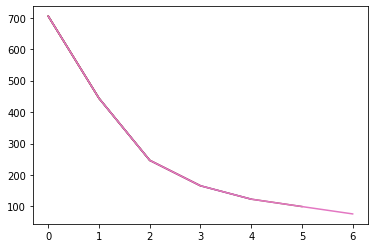

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[ 9.39821481e-02,  3.12614431e-01,  3.01794223e-01,
         6.92749381e-01,  1.11237485e-01],
       [ 7.41438466e+00,  2.00705964e+00,  2.29195320e+00,
        -7.05538519e-03,  1.50907710e-01],
       [-1.48505364e-01,  1.14246277e+01,  3.12299168e+00,
         3.50021606e+00,  1.18603269e+00]])

In [ ]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.093982,0.312614,0.301794,0.692749,0.111237
1,7.414385,2.007060,2.291953,-0.007055,0.150908
2,-0.148505,11.424628,3.122992,3.500216,1.186033


In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,0
9,0


In [ ]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.050811,-0.093191,-0.102826,-0.022099,0.426698
1,0.169758,-0.087696,-0.099610,-0.022912,0.202399
2,-0.399115,-0.011130,-0.096618,0.849787,2.323520
3,-0.367173,0.834829,3.164880,1.044650,-0.956596
4,3.627965,4.933443,4.216760,0.026871,-0.573813
5,-0.396684,-0.008861,-0.089161,0.582470,1.183025
6,14.053787,0.436740,0.187428,-0.023649,-0.267884
7,-0.360847,1.238478,0.281769,1.275289,0.428497
8,0.391387,-0.083456,-0.096494,-0.023341,0.049166
9,0.278703,0.003559,-0.071548,-0.017728,0.298828


In [ ]:
names = pd.DataFrame(group['업종중분류'])
names.reset_index(inplace=True, drop=True)
names

,업종중분류
0,기계/장비 대여
1,농기구
2,다단계판매
3,대중교통
4,마트/슈퍼마켓
5,면세점
6,미용/사우나/마사지
7,백화점
8,사진
9,사회단체


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종중분류,클러스터
0,-0.050811,-0.093191,-0.102826,-0.022099,0.426698,기계/장비 대여,0
1,0.169758,-0.087696,-0.099610,-0.022912,0.202399,농기구,0
2,-0.399115,-0.011130,-0.096618,0.849787,2.323520,다단계판매,0
3,-0.367173,0.834829,3.164880,1.044650,-0.956596,대중교통,0
4,3.627965,4.933443,4.216760,0.026871,-0.573813,마트/슈퍼마켓,1
5,-0.396684,-0.008861,-0.089161,0.582470,1.183025,면세점,0
6,14.053787,0.436740,0.187428,-0.023649,-0.267884,미용/사우나/마사지,1
7,-0.360847,1.238478,0.281769,1.275289,0.428497,백화점,0
8,0.391387,-0.083456,-0.096494,-0.023341,0.049166,사진,0
9,0.278703,0.003559,-0.071548,-0.017728,0.298828,사회단체,0


In [ ]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.093982,0.312614,0.301794,0.692749,0.111237
1,7.414385,2.007060,2.291953,-0.007055,0.150908
2,-0.148505,11.424628,3.122992,3.500216,1.186033


In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종중분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='Cluster2',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [ ]:
sh['업종대분류'].unique()

array(['생활서비스', '종합유통'], dtype=object)

In [ ]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종중분류'].unique():
  show_cluster(result, col)

0    0
Name: 클러스터, dtype: int32


1    0
Name: 클러스터, dtype: int32


3    0
Name: 클러스터, dtype: int32


6    1
Name: 클러스터, dtype: int32


8    0
Name: 클러스터, dtype: int32


9    0
Name: 클러스터, dtype: int32


10    0
Name: 클러스터, dtype: int32


11    0
Name: 클러스터, dtype: int32


14    0
Name: 클러스터, dtype: int32


15    0
Name: 클러스터, dtype: int32


16    0
Name: 클러스터, dtype: int32


18    2
Name: 클러스터, dtype: int32


19    0
Name: 클러스터, dtype: int32


20    1
Name: 클러스터, dtype: int32


22    0
Name: 클러스터, dtype: int32


23    0
Name: 클러스터, dtype: int32


26    0
Name: 클러스터, dtype: int32


27    0
Name: 클러스터, dtype: int32


2    0
Name: 클러스터, dtype: int32


4    1
Name: 클러스터, dtype: int32


5    0
Name: 클러스터, dtype: int32


7    0
Name: 클러스터, dtype: int32


12    0
Name: 클러스터, dtype: int32


13    0
Name: 클러스터, dtype: int32


17    2
Name: 클러스터, dtype: int32


21    0
Name: 클러스터, dtype: int32


25    1
Name: 클러스터, dtype: int32


24    0
Name: 클러스터, dtype: int32


In [ ]:
sh[sh['업종대분류']=='기타']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액


In [ ]:
sh[sh['업종대분류']=='종합유통']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
320,201903,강원,종합유통,마트/슈퍼마켓,대형마트,0,0,26,11517812000,236962,442992766,48606
321,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 기업형,0,0,30,1177091000,59052,39236373,19933
322,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,7,10,1144,9315398000,495263,8142830,18809
323,201903,강원,종합유통,면세점,면세점,0,0,2,17839000,222,8919655,80357
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754
